In [ ]:

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/CECS551_Fianl_Project_Dataset/

/content/drive/My Drive/CECS551_Fianl_Project_Dataset


In [ ]:
import pandas as pd
import numpy as np
import chardet
import seaborn as sns
import matplotlib.pyplot as plt

stores = pd.read_csv("CECS551_dataset_01/stores.csv")
test = pd.read_csv("CECS551_dataset_01/test.csv")
train = pd.read_csv("CECS551_dataset_01/train.csv")
store_01 = pd.read_csv("CECS551_dataset_01/store_features/store_01.csv")
store_02 = pd.read_excel("CECS551_dataset_01/store_features/store_02.csv")
store_03 = pd.read_excel("CECS551_dataset_01/store_features/store_03.xlsx")
store_04 = pd.read_excel("CECS551_dataset_01/store_features/store_04.xlsx")
store_05 = pd.read_excel("CECS551_dataset_01/store_features/store_05.xlsx")
store_06 = pd.read_excel("CECS551_dataset_01/store_features/store_06.xlsx")
store_07 = pd.read_excel("CECS551_dataset_01/store_features/store_07.xlsx")
store_08 = pd.read_excel("CECS551_dataset_01/store_features/store_08.xlsx")
store_09 = pd.read_excel("CECS551_dataset_01/store_features/store_09.xlsx")
store_10 = pd.read_excel("CECS551_dataset_01/store_features/store_10.xlsx")
ind_stores = [store_01,store_02,store_03,store_04,store_05,store_06,store_07,store_08,store_09,store_10]
combined_stores = pd.concat(ind_stores)


In [ ]:
combined_stores.head()
combined_stores["datetime"] = pd.to_datetime(combined_stores["Date"])
combined_stores = combined_stores.drop(columns=['Date'])

In [ ]:
train_data = train.loc[train['Store'] <= 10].copy()
#train_data = train.loc[train['Store']].copy()


train_data = train_data.merge(train_data, how='left').merge(stores, how='left')


print(train_data)

#train_data = train_data.drop(columns = ['Weekly_Sales'])
train_data["datetime"] = pd.to_datetime(train_data["Date"])
train_data = train_data.drop(columns=['Date'])
train_data_expanded = pd.merge(train_data, combined_stores,  how='left', left_on=['Store','IsHoliday','datetime'], right_on = ['Store','IsHoliday','datetime'])
train_data_expanded = train_data_expanded.fillna(0)
train_data_expanded['IsHoliday'] = train_data_expanded['IsHoliday'].astype('str').map({'True':0,'False':1})
train_data_expanded['Type'] = train_data_expanded['Type'].astype('str').map({'A':0,'B':1,'C':2})
train_data_expanded

       Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size
0          1     1  2010-02-05      24924.50      False    A  151315
1          1     1  2010-02-12      46039.49       True    A  151315
2          1     1  2010-02-19      41595.55      False    A  151315
3          1     1  2010-02-26      19403.54      False    A  151315
4          1     1  2010-03-05      21827.90      False    A  151315
...      ...   ...         ...           ...        ...  ...     ...
97834     10    98  2012-09-28         22.34      False    B  126512
97835     10    98  2012-10-05        789.38      False    B  126512
97836     10    98  2012-10-12        477.24      False    B  126512
97837     10    98  2012-10-19        578.46      False    B  126512
97838     10    98  2012-10-26        560.02      False    B  126512

[97839 rows x 7 columns]


,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,datetime,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,1,24924.50,1,0,151315,2010-02-05,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833
1,1,1,46039.49,0,0,151315,2010-02-12,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833
2,1,1,41595.55,1,0,151315,2010-02-19,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833
3,1,1,19403.54,1,0,151315,2010-02-26,60.12,3.555,6129.28,1802.84,0.00,301.48,224.132020,6.833
4,1,1,21827.90,1,0,151315,2010-03-05,61.65,3.630,3552.58,601.32,0.00,2666.22,224.347025,6.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97834,10,98,22.34,1,1,126512,2012-09-28,82.52,3.966,6091.96,62.82,2.82,3350.88,131.043000,7.170
97835,10,98,789.38,1,1,126512,2012-10-05,80.88,4.132,8975.95,0.00,46.24,9546.75,131.075667,6.943
97836,10,98,477.24,1,1,126512,2012-10-12,76.03,4.468,2674.51,0.00,10.32,1390.15,131.108333,6.943
97837,10,98,578.46,1,1,126512,2012-10-19,72.71,4.449,3067.64,0.00,53.60,967.02,131.149968,6.943


In [ ]:
train_data_expanded = pd.merge(train_data, combined_stores,  how='left', left_on=['Store','IsHoliday','datetime'], right_on = ['Store','IsHoliday','datetime'])
train_data_expanded = train_data_expanded.fillna(0)
train_data_expanded['IsHoliday'] = train_data_expanded['IsHoliday'].astype('str').map({'True':0,'False':1})
train_data_expanded['Type'] = train_data_expanded['Type'].astype('str').map({'A':0,'B':1,'C':2})


In [ ]:
train_data_expanded

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,datetime,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,1,24924.50,1,0,151315,2010-02-05,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833
1,1,1,46039.49,0,0,151315,2010-02-12,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833
2,1,1,41595.55,1,0,151315,2010-02-19,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833
3,1,1,19403.54,1,0,151315,2010-02-26,60.12,3.555,6129.28,1802.84,0.00,301.48,224.132020,6.833
4,1,1,21827.90,1,0,151315,2010-03-05,61.65,3.630,3552.58,601.32,0.00,2666.22,224.347025,6.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97834,10,98,22.34,1,1,126512,2012-09-28,82.52,3.966,6091.96,62.82,2.82,3350.88,131.043000,7.170
97835,10,98,789.38,1,1,126512,2012-10-05,80.88,4.132,8975.95,0.00,46.24,9546.75,131.075667,6.943
97836,10,98,477.24,1,1,126512,2012-10-12,76.03,4.468,2674.51,0.00,10.32,1390.15,131.108333,6.943
97837,10,98,578.46,1,1,126512,2012-10-19,72.71,4.449,3067.64,0.00,53.60,967.02,131.149968,6.943


In [ ]:
test_data = test.loc[test['Store'] <= 10].copy()
test_data = test_data.merge(test_data, how='left').merge(stores, how='left')
test_data["datetime"] = pd.to_datetime(test_data["Date"])
test_data = test_data.drop(columns=['Date'])
test_data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

test_data_expanded = pd.merge(test_data, combined_stores,  how='left', left_on=['Store','IsHoliday','datetime'], right_on = ['Store','IsHoliday','datetime'])
test_data_expanded = test_data_expanded.fillna(0)
#test_data_expanded['IsHoliday'] = test_data_expanded['IsHoliday'].astype('str').map({'True':0,'False':1})
#test_data_expanded['Type'] = test_data_expanded['Type'].astype('str').map({'A':0,'B':1,'C':2})
test_data_expanded['Type_Cat'] = labelencoder.fit_transform(test_data_expanded['Type'])
test_data_expanded

,Store,Dept,IsHoliday,Type,Size,datetime,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Type_Cat
0,1,1,False,A,151315,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,223.462779,7.931,0
1,1,1,False,A,151315,2012-11-09,61.24,3.314,11421.32,3370.89,40.28,4646.79,223.481307,7.931,0
2,1,1,False,A,151315,2012-11-16,52.92,3.252,9696.28,292.10,103.78,1133.15,223.512911,7.931,0
3,1,1,True,A,151315,2012-11-23,56.23,3.211,883.59,4.17,74910.32,209.91,223.561947,7.852,0
4,1,1,False,A,151315,2012-11-30,52.34,3.207,2460.03,0.00,3838.35,150.57,223.610984,7.852,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26671,10,99,False,B,126512,2012-12-07,61.21,3.668,13613.52,0.00,822.00,3516.91,131.478400,6.943,1
26672,10,99,False,B,126512,2013-01-25,59.76,3.558,2255.78,1790.75,1.70,693.48,132.092290,6.897,1
26673,10,99,True,B,126512,2013-02-08,57.25,3.795,73407.49,127.12,440.16,37571.17,132.215129,6.897,1
26674,10,99,False,B,126512,2013-05-17,82.47,3.809,11371.40,109.94,10.10,2853.61,0.000000,0.000,1


In [ ]:
train_data_expanded = pd.merge(train_data, combined_stores,  how='left', left_on=['Store','IsHoliday','datetime'], right_on = ['Store','IsHoliday','datetime'])
train_data_expanded = train_data_expanded.fillna(0)
train_data_expanded['IsHoliday'] = train_data_expanded['IsHoliday'].astype('str').map({'True':0,'False':1})
train_data_expanded['Type'] = train_data_expanded['Type'].astype('str').map({'A':0,'B':1,'C':2})

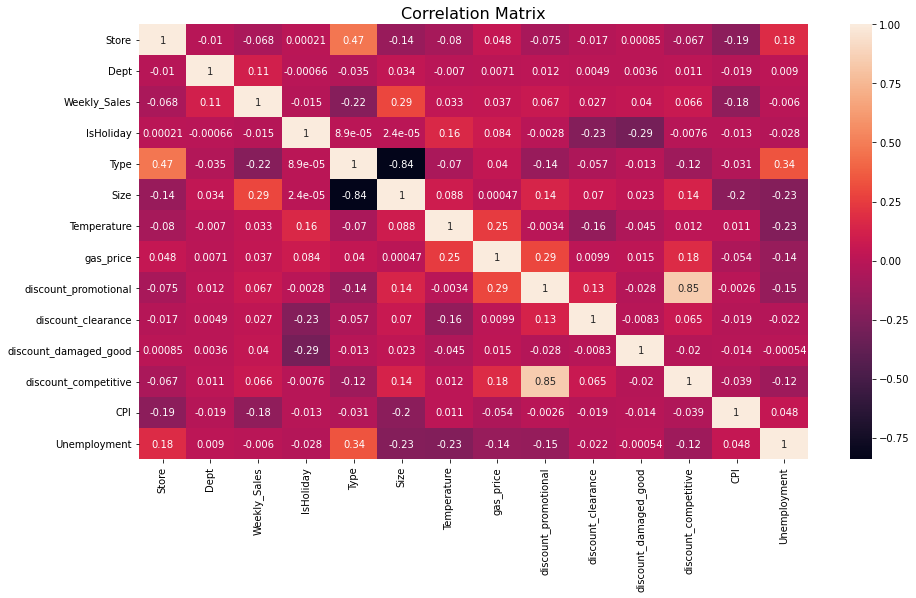

In [ ]:
def plotFigure(train_data_expanded):
  plt.figure(figsize=(15,8))
  corr = train_data_expanded.corr()
  sns.heatmap(corr,vmax=1.0,annot=True)
  plt.title('Correlation Matrix',fontsize=16)
  plt.show()
  train_data_expanded.fillna(value=0,inplace=True)

  return train_data_expanded

data = plotFigure(train_data_expanded)

In [ ]:
test_data = test.loc[test['Store'] <= 10].copy()
test_data = test_data.merge(test_data, how='left').merge(stores, how='left')
print(test_data)
test_data["datetime"] = pd.to_datetime(test_data["Date"])
test_data = test_data.drop(columns=['Date'])
test_data_expanded = pd.merge(test_data, combined_stores,  how='left', left_on=['Store','IsHoliday','datetime'], right_on = ['Store','IsHoliday','datetime'])
test_data_expanded = test_data_expanded.fillna(0) 
test_data_expanded['IsHoliday'] = test_data_expanded['IsHoliday'].astype('str').map({'True':0,'False':1})
test_data_expanded['Type'] = test_data_expanded['Type'].astype('str').map({'A':0,'B':1,'C':2})
test_data_expanded


       Store  Dept        Date  IsHoliday Type    Size
0          1     1  2012-11-02      False    A  151315
1          1     1  2012-11-09      False    A  151315
2          1     1  2012-11-16      False    A  151315
3          1     1  2012-11-23       True    A  151315
4          1     1  2012-11-30      False    A  151315
...      ...   ...         ...        ...  ...     ...
26671     10    99  2012-12-07      False    B  126512
26672     10    99  2013-01-25      False    B  126512
26673     10    99  2013-02-08       True    B  126512
26674     10    99  2013-05-17      False    B  126512
26675     10    99  2013-05-24      False    B  126512

[26676 rows x 6 columns]


,Store,Dept,IsHoliday,Type,Size,datetime,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,1,1,0,151315,2012-11-02,55.32,3.386,6766.44,5147.70,50.82,3639.90,223.462779,7.931
1,1,1,1,0,151315,2012-11-09,61.24,3.314,11421.32,3370.89,40.28,4646.79,223.481307,7.931
2,1,1,1,0,151315,2012-11-16,52.92,3.252,9696.28,292.10,103.78,1133.15,223.512911,7.931
3,1,1,0,0,151315,2012-11-23,56.23,3.211,883.59,4.17,74910.32,209.91,223.561947,7.852
4,1,1,1,0,151315,2012-11-30,52.34,3.207,2460.03,0.00,3838.35,150.57,223.610984,7.852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26671,10,99,1,1,126512,2012-12-07,61.21,3.668,13613.52,0.00,822.00,3516.91,131.478400,6.943
26672,10,99,1,1,126512,2013-01-25,59.76,3.558,2255.78,1790.75,1.70,693.48,132.092290,6.897
26673,10,99,0,1,126512,2013-02-08,57.25,3.795,73407.49,127.12,440.16,37571.17,132.215129,6.897
26674,10,99,1,1,126512,2013-05-17,82.47,3.809,11371.40,109.94,10.10,2853.61,0.000000,0.000


In [ ]:
train_data_expanded = train_data_expanded.drop(columns =['Temperature','gas_price','discount_promotional','discount_clearance','discount_damaged_good','discount_competitive','CPI'])
train_data_expanded


,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,datetime,Unemployment
0,1,1,24924.50,1,0,151315,2010-02-05,6.833
1,1,1,46039.49,0,0,151315,2010-02-12,6.833
2,1,1,41595.55,1,0,151315,2010-02-19,6.833
3,1,1,19403.54,1,0,151315,2010-02-26,6.833
4,1,1,21827.90,1,0,151315,2010-03-05,6.833
...,...,...,...,...,...,...,...,...
97834,10,98,22.34,1,1,126512,2012-09-28,7.170
97835,10,98,789.38,1,1,126512,2012-10-05,6.943
97836,10,98,477.24,1,1,126512,2012-10-12,6.943
97837,10,98,578.46,1,1,126512,2012-10-19,6.943


In [ ]:
#open'ı kullanıcaz sadece:
from sklearn.preprocessing import MinMaxScaler #bununla, 0-1 arasına scale ettik
scaler = MinMaxScaler(feature_range = (0, 1))
train_rnn = train_data_expanded.loc[:, ['Type']].values #array'e çevirdik
train_rnn = scaler.fit_transform(train_rnn)
train_rnn


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

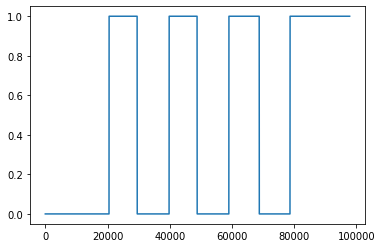

In [ ]:
plt.plot(train_rnn)

In [ ]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1250):
    X_train.append(train_rnn[i - timesteps:i, 0])
    y_train.append(train_rnn[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#Reshaping:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train)
print(y_train)

[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]
[0. 0. 0. ... 0. 0. 0.]


In [ ]:
#import libraries and packages:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 6s 48ms/step - loss: 0.0000e+00
Epoch 2/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0000e+00
Epoch 3/50
38/38 [==============================] - 2s 49ms/step - loss: 0.0000e+00
Epoch 4/50
38/38 [==============================] - 2s 47ms/step - loss: 0.0000e+00
Epoch 5/50
38/38 [==============================] - 2s 46ms/step - loss: 0.0000e+00
Epoch 6/50
38/38 [==============================] - 2s 50ms/step - loss: 0.0000e+00
Epoch 7/50
38/38 [==============================] - 3s 79ms/step - loss: 0.0000e+00
Epoch 8/50
38/38 [==============================] - 3s 68ms/step - loss: 0.0000e+00
Epoch 9/50
38/38 [==============================] - 2s 46ms/step - loss: 0.0000e+00
Epoch 10/50
38/38 [==============================] - 2s 47ms/step - loss: 0.0000e+00
Epoch 11/50
38/38 [==============================] - 2s 46ms/step - loss: 0.0000e+00
Epoch 12/50
38/38 [==============================] - 2s 48ms/step - loss: 

In [ ]:
real_store_type = test_data_expanded.loc[:, ['Type']].values
print(real_store_type)

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [ ]:
#Getting the predicted type price
dataset_total = pd.concat((train_data_expanded['Type'], test_data_expanded['Type']), axis=0)
inputs = dataset_total[len(dataset_total)-len(test_data_expanded) - timesteps:].values.reshape(-1,1)
print(len(inputs))

26726


In [ ]:
X_test = []
for i in range(timesteps, 70):
    print(inputs[i-timesteps:i,0])
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(len(X_test))
predicted_store_type = regressor.predict(X_test)
predicted_store_type = scaler.inverse_transform(predicted_store_type)
print(len(predicted_store_type))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

20


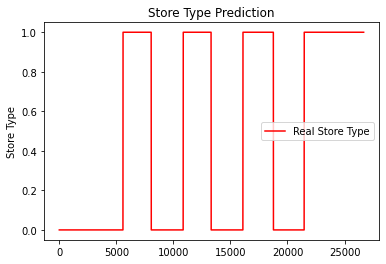

In [ ]:
plt.plot(real_store_type, color='red', label='Real Store Type')
#plt.plot(predicted_store_type, color='blue', label='Predicted Store Type')
print(len(predicted_store_type))
plt.title('Store Type Prediction')
#plt.xlabel('Time')
plt.ylabel('Store Type')
plt.legend()
plt.show()

20


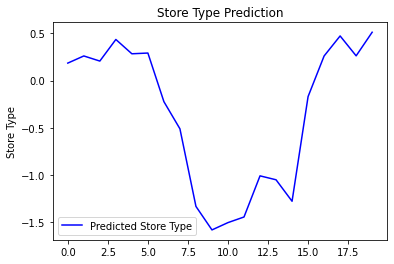

In [ ]:
#plt.plot(real_store_type, color='red', label='Real Store Type')
plt.plot(predicted_store_type, color='blue', label='Predicted Store Type')
print(len(predicted_store_type))
plt.title('Store Type Prediction')
#plt.xlabel('Time')
plt.ylabel('Store Type')
plt.legend()
plt.show()

In [ ]:
train_data = train.loc[train['Store'] <= 10].copy()

train_data = train_data.merge(train_data, how='left').merge(stores, how='left')

train_data = train_data.drop(columns = ['Weekly_Sales'])
train_data["datetime"] = pd.to_datetime(train_data["Date"])
train_data = train_data.drop(columns=['Date'])
train_data_expanded = pd.merge(train_data, combined_stores,  how='left', left_on=['Store','IsHoliday','datetime'], right_on = ['Store','IsHoliday','datetime'])
train_data_expanded = train_data_expanded.fillna(0)
train_data_expanded['IsHoliday'] = train_data_expanded['IsHoliday'].astype('str').map({'True':0,'False':1})
train_data_expanded['Type'] = train_data_expanded['Type'].astype('str').map({'A':0,'B':1,'C':2})
train_data_expanded

,Store,Dept,IsHoliday,Type,Size,datetime,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment
0,1,1,1,0,151315,2010-02-05,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833
1,1,1,0,0,151315,2010-02-12,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833
2,1,1,1,0,151315,2010-02-19,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833
3,1,1,1,0,151315,2010-02-26,60.12,3.555,6129.28,1802.84,0.00,301.48,224.132020,6.833
4,1,1,1,0,151315,2010-03-05,61.65,3.630,3552.58,601.32,0.00,2666.22,224.347025,6.833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97834,10,98,1,1,126512,2012-09-28,82.52,3.966,6091.96,62.82,2.82,3350.88,131.043000,7.170
97835,10,98,1,1,126512,2012-10-05,80.88,4.132,8975.95,0.00,46.24,9546.75,131.075667,6.943
97836,10,98,1,1,126512,2012-10-12,76.03,4.468,2674.51,0.00,10.32,1390.15,131.108333,6.943
97837,10,98,1,1,126512,2012-10-19,72.71,4.449,3067.64,0.00,53.60,967.02,131.149968,6.943


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train_data_expanded = pd.merge(train_data, combined_stores,  how='left', left_on=['Store','IsHoliday','datetime'], right_on = ['Store','IsHoliday','datetime'])
train_data_expanded = train_data_expanded.fillna(0)
#train_data_expanded['IsHoliday'] = train_data_expanded['IsHoliday'].astype('str').map({'True':0,'False':1})
#train_data_expanded['Type'] = train_data_expanded['Type'].astype('str').map({'A':0,'B':1,'C':2})
train_data_expanded['IsHoliday'] = labelencoder.fit_transform(train_data_expanded['IsHoliday'])
train_data_expanded['Type_Cat'] = labelencoder.fit_transform(train_data_expanded['Type'])
train_data_expanded

,Store,Dept,IsHoliday,Type,Size,datetime,Temperature,gas_price,discount_promotional,discount_clearance,discount_damaged_good,discount_competitive,CPI,Unemployment,Type_Cat
0,1,1,0,A,151315,2010-02-05,59.33,3.360,9667.50,268.29,0.60,8368.15,223.659114,6.833,0
1,1,1,1,A,151315,2010-02-12,51.65,3.409,8687.47,1594.87,2.20,2144.87,223.753643,6.833,0
2,1,1,0,A,151315,2010-02-19,52.39,3.510,2706.87,3128.74,1.88,2396.68,223.917015,6.833,0
3,1,1,0,A,151315,2010-02-26,60.12,3.555,6129.28,1802.84,0.00,301.48,224.132020,6.833,0
4,1,1,0,A,151315,2010-03-05,61.65,3.630,3552.58,601.32,0.00,2666.22,224.347025,6.833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97834,10,98,0,B,126512,2012-09-28,82.52,3.966,6091.96,62.82,2.82,3350.88,131.043000,7.170,1
97835,10,98,0,B,126512,2012-10-05,80.88,4.132,8975.95,0.00,46.24,9546.75,131.075667,6.943,1
97836,10,98,0,B,126512,2012-10-12,76.03,4.468,2674.51,0.00,10.32,1390.15,131.108333,6.943,1
97837,10,98,0,B,126512,2012-10-19,72.71,4.449,3067.64,0.00,53.60,967.02,131.149968,6.943,1


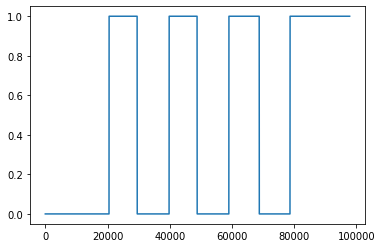

In [ ]:
#open'ı kullanıcaz sadece:
train = train_data_expanded.loc[:, ['Type_Cat']].values #array'e çevirdik
train
plt.plot(train)

In [ ]:
import os
import random

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error

DATADIR = "./Dataset"
TRAIN_TEST_CUTOFF = '2016-04-21'
TRAIN_VALID_RATIO = 0.75


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def f1macro(y_true, y_pred):
    f_pos = f1_m(y_true, y_pred)
    # negative version of the data and prediction
    f_neg = f1_m(1-y_true, 1-K.clip(y_pred,0,1))
    return (f_pos + f_neg)/2

def cnnpred_2d(seq_len=60, n_features=82, n_filters=(8,8,8), droprate=0.1):
    "2D-CNNpred model according to the paper"
    model = Sequential([
        Input(shape=(seq_len, n_features, 1)),
        Conv2D(n_filters[0], kernel_size=(1, n_features), activation="relu"),
        Conv2D(n_filters[1], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Conv2D(n_filters[2], kernel_size=(3,1), activation="relu"),
        MaxPool2D(pool_size=(2,1)),
        Flatten(),
        Dropout(droprate),
        Dense(1, activation="sigmoid")
    ])
    return model

def datagen(data, seq_len, batch_size, targetcol, kind):
    "As a generator to produce samples for Keras model"
    batch = []
    while True:
        #print(TRAIN_TEST_CUTOFF)
        # Pick one dataframe from the pool
        key = random.choice(list(data.keys()))
        df = data[key]
        input_cols = [c for c in df.columns if c != targetcol]
        #print(df.index)
        #print(TRAIN_TEST_CUTOFF)
        index = df.index[df.index]
        split = int(len(index) * TRAIN_VALID_RATIO)
        assert split > seq_len, "Training data too small for sequence length {}".format(seq_len)
        if kind == 'train':
            index = index[:split]   # range for the training set
        elif kind == 'valid':
            index = index[split:]   # range for the validation set
        else:
            raise NotImplementedError
        # Pick one position, then clip a sequence length
        while True:
            t = random.choice(index)     # pick one time step
            n = (df.index == t).argmax() # find its position in the dataframe
            if n-seq_len+1 < 0:
                continue # this sample is not enough for one sequence length
            frame = df.iloc[n-seq_len+1:n+1]
            batch.append([frame[input_cols].values, df.loc[t, targetcol]])
            break
        # if we get enough for a batch, dispatch
        if len(batch) == batch_size:
            X, y = zip(*batch)
            X, y = np.expand_dims(np.array(X), 3), np.array(y)
            yield X, y
            batch = []
            print('exiting datagen')

def testgen(data, seq_len, targetcol):
    "Return array of all test samples"
    batch = []
    for key, df in data.items():
        input_cols = [c for c in df.columns if c != targetcol]
        # find the start of test sample
        t = df.index[df.index >= TRAIN_TEST_CUTOFF][0]
        n = (df.index == t).argmax()
        # extract sample using a sliding window
        for i in range(n+1, len(df)+1):
            frame = df.iloc[i-seq_len:i]
            batch.append([frame[input_cols].values, frame[targetcol][-1]])
    X, y = zip(*batch)
    return np.expand_dims(np.array(X),3), np.array(y)

# Read data into pandas DataFrames
data = {}
#for filename in os.listdir(DATADIR):
#    if not filename.lower().endswith(".csv"):
#        continue # read only the CSV files
#    filepath = os.path.join(DATADIR, filename)
X = train_data_expanded
    # basic preprocessing: get the name, the classification
    # Save the target variable as a column in dataframe for easier dropna()
name = X["Type"][0]
del X["Type"]
cols = X.columns
X["Target"] = X["Type_Cat"]
X.dropna(inplace=True)
# Fit the standard scaler using the training dataset
#index = X.index[X.index < TRAIN_TEST_CUTOFF]
#index = index[:int(len(index) * TRAIN_VALID_RATIO)]
#scaler = StandardScaler().fit(X[cols])
# Save scale transformed dataframe
#X[cols] = scaler.transform(X[cols])
data[name] = X

seq_len = 60
batch_size = 128
n_epochs = 20
n_features = 82

# Produce CNNpred as a binary classification problem
model = cnnpred_2d(seq_len, n_features)
model.compile(optimizer="adam", loss="mae", metrics=["acc", f1macro])
model.summary()  # print model structure to console

# Set up callbacks and fit the model
# We use custom validation score f1macro() and hence monitor for "val_f1macro"
checkpoint_path = "./cp2d-{epoch}-{val_f1macro:.2f}.h5"
callbacks = [
    ModelCheckpoint(checkpoint_path,
                    monitor='val_f1macro', mode="max",
                    verbose=0, save_best_only=True, save_weights_only=False, save_freq="epoch")
]
model.fit(datagen(data, seq_len, batch_size, "Target", "train"),
          validation_data=datagen(data, seq_len, batch_size, "Target", "valid"),
          epochs=n_epochs,
          steps_per_epoch=400,
          validation_steps=10,
          verbose=1
          #,callbacks=callbacks
          )

# Prepare test data
test_data, test_target = testgen(data, seq_len, "Target")

# Test the model
test_out = model.predict(test_data)
test_pred = (test_out > 0.5).astype(int)
print("accuracy:", accuracy_score(test_pred, test_target))
print("MAE:", mean_absolute_error(test_pred, test_target))
print("F1:", f1_score(test_pred, test_target))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 1, 8)          664       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 1, 8)          200       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 1, 8)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 1, 8)          200       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 1, 8)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 104)              

ValueError: ignored